## Take-Home Challenge: Relax Inc
                                            By Muluemebet Ayalew
                                            June, 2020

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

### Read the data 

In [2]:
user= pd.read_csv("takehome_users.csv", parse_dates= ["creation_time"],engine="python" ) # encoding='utf-8')
engagement=pd.read_csv("takehome_user_engagement.csv", parse_dates=["time_stamp"], engine="python") #encoding= "utf-8" )

In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


###  Group by user id and weekly frequency

In [7]:
# Group the login by user id and day and sum up the number of login for each day.
# each user has single login for each day
engagement.groupby(["user_id", pd.Grouper(key="time_stamp", freq='D')]).count().max()

visited    1
dtype: int64

In [8]:
# Group by user id and week and sum the number of visit   
grouped_weekly= engagement.groupby(["user_id", pd.Grouper(key="time_stamp", freq='W')]).sum()

In [9]:
grouped_weekly.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-12-01        1
        2013-12-15        1
        2013-12-29        1

In [10]:
grouped_weekly.visited.max()

7

In [11]:
grouped_weekly.visited.idxmax()# index of users with maximum login by week  

(10, Timestamp('2014-02-23 00:00:00', freq='W-SUN'))

In [12]:
grouped_weekly[grouped_weekly["visited"]>=3].head() # explor addoted users

visited
user_id time_stamp         
2       2014-02-09        3
10      2013-03-03        3
        2013-04-14        3
        2013-04-28        3
        2013-05-05        4

In [13]:
# look at addopetd user id and week
id_week_indx= grouped_weekly[grouped_weekly["visited"]>=3].index
id_week_indx[:5] # look at the index

MultiIndex([( 2, '2014-02-09'),
            (10, '2013-03-03'),
            (10, '2013-04-14'),
            (10, '2013-04-28'),
            (10, '2013-05-05')],
           names=['user_id', 'time_stamp'])

In [14]:
adopted_id=[] # place holder for adopted user id
for i in id_week_indx:
    adopted_id.append(i[0])
len(set(adopted_id)) # number of unique id of adopted users,1445

1445

In [15]:
unique_adopted_id= set(adopted_id) # get the unique id

In [16]:
# create new column adopted_user 
user["adopted_user"]=user["object_id"].apply(lambda x: x in unique_adopted_id)

In [17]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


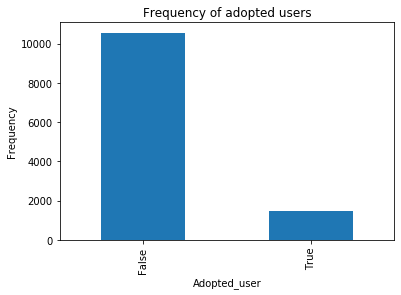

In [18]:
user["adopted_user"].value_counts().plot.bar(title="Frequency of adopted users")
_=plt.xlabel("Adopted_user")
_=plt.ylabel("Frequency")

In [19]:
pd.crosstab(user["creation_source"], user["adopted_user"] )

adopted_user,False,True
creation_source,,
GUEST_INVITE,1837,326
ORG_INVITE,3763,491
PERSONAL_PROJECTS,1964,147
SIGNUP,1812,275
SIGNUP_GOOGLE_AUTH,1179,206


###  Identifying important 
Now, the data is ready for further analysis. We can use the categorical column  ‘adopted_user’  as a dependent variable and other variables from the table 'user'( takehome_users.csv) as independent variables and make a predictive model. Classification methods such as logistic regression and random forest can be used to make prediction as well as identifying important predictor variables. It is not included here. We need to select variables from the list and make some data preparation to fit the models. 